## Naive KNN for MNIST

In [4]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
%matplotlib inline

mndata = MNIST('data')
trX,trY = mndata.load_training()
teX,teY = mndata.load_testing()
training_data  = np.asarray(trX)
test_data      = np.asarray(teX)

# One_Hot Encoding
targets = np.asarray(trY).reshape(-1)
one_hot_targets = np.eye(10)[targets]
training_label = one_hot_targets
targets = np.asarray(teY).reshape(-1)
one_hot_targets = np.eye(10)[targets]
test_label = one_hot_targets

In [97]:
trLabel=np.array(trY)
teLabel=np.array(teY)

## Distances

In [58]:
def Euclidean_distance (x, y):
    return np.sqrt(np.sum(np.square((x-y))))

def L1_distance (x,y):
    return np.sum(np.abs(x-y))

## Prediction

In [116]:
def predict(te, k):
    numTr = training_data.shape[0]
    dist = np.zeros([numTr])
    
    # calculate distances
    for i in range(numTr):
        dist[i]=Euclidean_distance(te,training_data[i,:])
    
    # find nearest neighbor
    nearest = trLabel[np.argsort(dist)[:k]]
    # majority voting
    counts = np.bincount(nearest)
    return np.argmax(counts)

In [130]:
k=5
numData = test_data.shape[0]
pr=np.zeros([numData])
for i in range(numData):
    pr[i]=predict(test_data[i,:],k)
    if i%100==0:
        print('=', end=' ')

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

In [136]:
200%100

0

## Accuracy check

In [131]:
equals = np.equal(pr, teLabel)
acc = np.sum(equals)/teLabel.shape[0]
print ('Accuracy : %.2f' %(acc*100) +'%')

Accuracy : 96.88%


In [92]:
a=np.array([1,2,3,4,5])
b=np.array([1,2,5,4,2])
c=np.equal(a,b)
np.sum(c)

3

In [77]:
a = np.array([2,2,3,1,2,2,1,1,1,1,3,2,2,1])
counts = np.bincount(a)
print (np.argmax(counts))

1


In [61]:
a=np.array([1,2,30,0,5])
b=np.array([2,3,5,1,4])
b[np.argsort(a)[:2]]

array([1, 2])

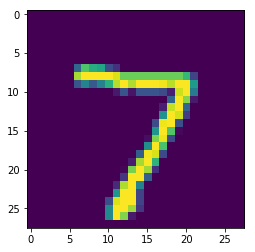

In [90]:
plt.imshow(np.reshape(test_data[0,:],[28,28]))